In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df_train = pd.read_csv("SemArt/semart_train.csv", sep="	", encoding="unicode_escape")
df_train.columns = df_train.columns.str.lower()

#split the 'technique' column into 'technique_only' and 'size_only'
df_train[['technique_only', 'size_only']] = df_train['technique'].str.split(',', 1, expand=True)

#strip any whitespace characters from the new columns
df_train['technique_only'] = df_train['technique_only'].str.strip()
df_train['size_only'] = df_train['size_only'].str.strip()

df_test = pd.read_csv("SemArt/semart_test.csv", sep="	", encoding ="unicode_escape")
df_test.columns = df_test.columns.str.lower()

df_train

/var/folders/y6/2mg4f4gx0955xc9_y_q271nr0000gp/T/ipykernel_1620/1509921517.py:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_train[['technique_only', 'size_only']] = df_train['technique'].str.split(',', 1, expand=True)


,image_file,description,author,title,technique,date,type,school,timeframe,technique_only,size_only
0,19873-1darmst.jpg,"The Meyer or Darmstadt Madonna is the last, mo...","HOLBEIN, Hans the Younger",Darmstadt Madonna,"Oil on limewood, 147 x 102 cm",1526 and after 1528,religious,German,1501-1550,Oil on limewood,147 x 102 cm
1,18759-guard301.jpg,Whereas Canaletto incorporates classically ins...,"GUARDI, Francesco",Landscape with a Fisherman's Tent,"Oil on canvas, 49 x 77 cm",1770-75,landscape,Italian,1751-1800,Oil on canvas,49 x 77 cm
2,04589-temptati.jpg,In this painting the refinement of the colouri...,"BILIVERT, Giovanni",The Temptation of Charles and Ubalde,"Oil on copper, 37 x 28 cm",1629-30,religious,Italian,1601-1650,Oil on copper,37 x 28 cm
3,15104-magi.jpg,"The left side of the painting was cut, origina...",GEERTGEN tot Sint Jans,Adoration of the Magi,"Panel, 111 x 69 cm",1480-85,religious,Netherlandish,1451-1500,Panel,111 x 69 cm
4,36582-paolo_f1.jpg,The painting illustrates a famous episode from...,"SCHEFFER, Ary",The Ghosts of Paolo and Francesca Appear to Da...,"Oil on canvas, 167 x 234 cm",1835,other,Dutch,1801-1850,Oil on canvas,167 x 234 cm
...,...,...,...,...,...,...,...,...,...,...,...
19239,07228-canal515.jpg,This picture is a supreme example of a distinc...,CANALETTO,Venice: The Grand Canal from Palazzo Flangini ...,"Oil on canvas, 47 x 78 cm",c.1738,landscape,Italian,1701-1750,Oil on canvas,47 x 78 cm
19240,06294-fighting.jpg,Dutch realism was a matter not merely of imita...,"BROUWER, Adriaen",Peasants Fighting,"Oil on wood, 33 x 49 cm",1631-35,genre,Flemish,1601-1650,Oil on wood,33 x 49 cm
19241,21607-mytholo1.jpg,Lauri's speciality was the ideal landscape wit...,"LAURI, Filippo",Venus and Adonis,"Oil on copper, 18 x 29 cm",1650s,mythological,Italian,1651-1700,Oil on copper,18 x 29 cm
19242,02815-bacchant.jpg,Augustin was a French miniaturist who revived ...,"AUGUSTIN, Jean-Baptiste-Jacques",A Bacchante,"Ivory, diameter: 8 cm",1799,mythological,French,1751-1800,Ivory,diameter: 8 cm


# Summary statistics

## Authors

In [4]:
author_counts = df_train['author'].value_counts()
author_counts.describe()

count    3166.000000
mean        6.078332
std        15.812633
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       291.000000
Name: author, dtype: float64

In [5]:
# Replace all variations of 'UNKNOWN' in the 'author' column with 'UNKNOWN'
df_train['author'] = df_train['author'].str.replace(r'UNKNOWN.*', 'UNKNOWN', regex=True)

author_counts = df_train['author'].value_counts()
author_counts.describe()

count    3149.000000
mean        6.111146
std        17.206322
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       418.000000
Name: author, dtype: float64

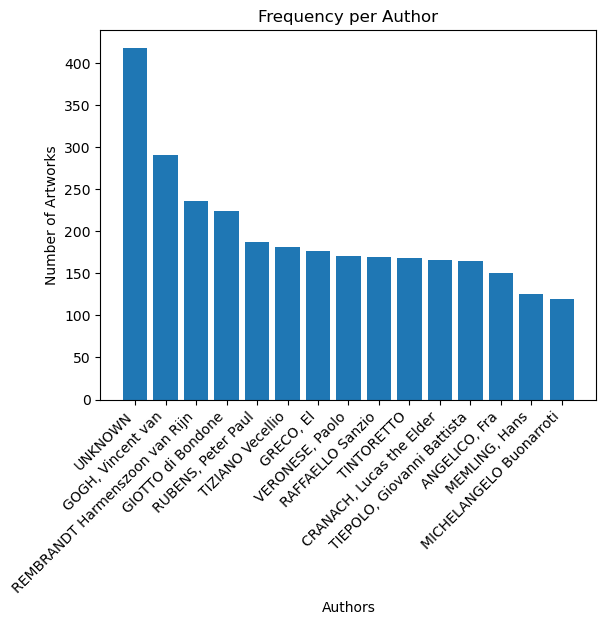

In [6]:
frequent_authors = author_counts.head(15)

plt.bar(frequent_authors.index, frequent_authors.values) 
plt.xlabel('Authors') 
plt.ylabel('Number of Artworks') 
plt.title('Frequency per Author')  
plt.xticks(rotation=45, ha='right')  
plt.show()

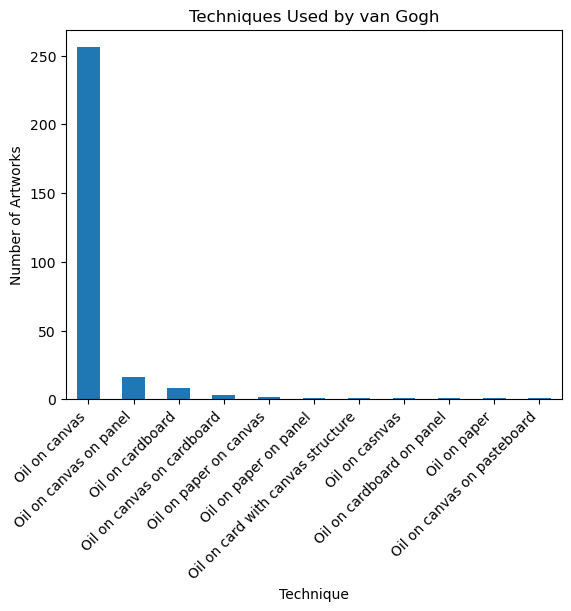

In [7]:
#analyze techniques used by a specific author
author_techniques = df_train[df_train['author'] == 'GOGH, Vincent van']['technique_only'].value_counts()

#bar chart of techniques by a specific author
author_techniques.plot(kind='bar')
plt.title('Techniques Used by van Gogh')
plt.xlabel('Technique')
plt.ylabel('Number of Artworks')
plt.xticks(rotation=45, ha='right')  
plt.show()

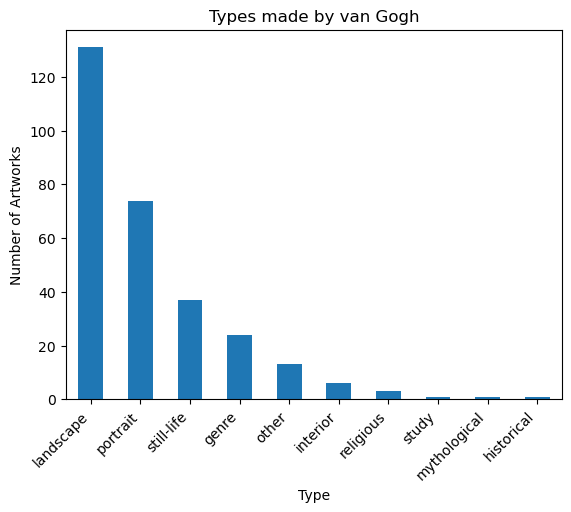

In [8]:
#analyze types of art made by a specific author
author_types = df_train[df_train['author'] == 'GOGH, Vincent van']['type'].value_counts()

#bar chart of techniques by a specific author
author_types.plot(kind='bar')
plt.title('Types made by van Gogh')
plt.xlabel('Type')
plt.ylabel('Number of Artworks')
plt.xticks(rotation=45, ha='right')  
plt.show()

## Techniques

In [9]:
technique_counts = df_train['technique'].value_counts()
technique_counts.describe()

count    12297.000000
mean         1.564935
std         17.031231
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       1798.000000
Name: technique, dtype: float64

note: the 'technique' column consists of the technique and the size of the painting

### only technique

In [10]:
technique_only_counts = df_train['technique_only'].value_counts()
technique_only_counts.describe()

count     618.000000
mean       31.139159
std       389.879489
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max      9085.000000
Name: technique_only, dtype: float64

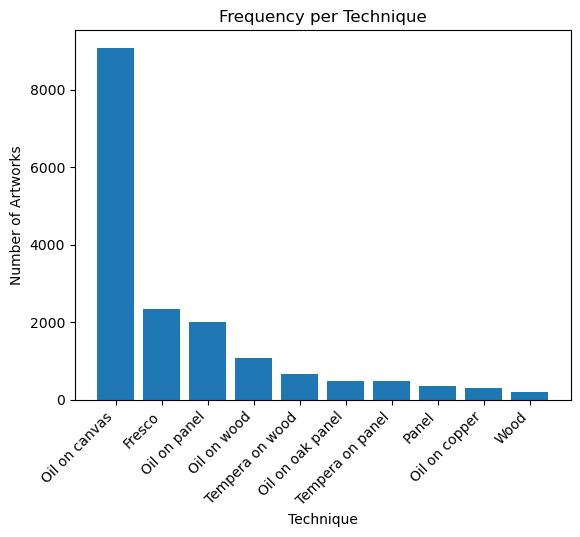

In [11]:
frequent_techniques = technique_only_counts.head(10)

plt.bar(frequent_techniques.index, frequent_techniques.values) 
plt.xlabel('Technique') 
plt.ylabel('Number of Artworks') 
plt.title('Frequency per Technique')  
plt.xticks(rotation=45, ha='right')  
plt.show()

### only size

In [12]:
size_only_counts = df_train['size_only'].value_counts()
size_only_counts.describe()

count    9677.000000
mean        1.676656
std         1.875112
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        62.000000
Name: size_only, dtype: float64

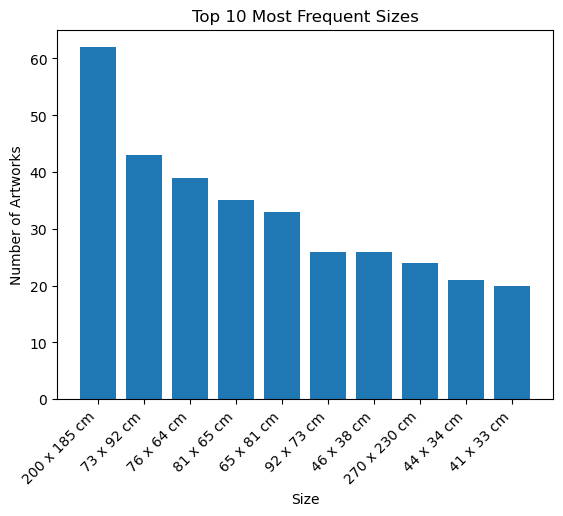

In [13]:
frequent_sizes = size_only_counts.head(10)

plt.bar(frequent_sizes.index, frequent_sizes.values) 
plt.xlabel('Size') 
plt.ylabel('Number of Artworks') 
plt.title('Top 10 Most Frequent Sizes')  
plt.xticks(rotation=45, ha='right')  
plt.show()

In [14]:
#function to calculate the surface area from size_only string
def calculate_surface(size_str):
    if pd.isna(size_str):
        return None
    try:
        dimensions = size_str.replace('cm', '').strip().split('x') #split length and witdth
        width = float(dimensions[0].strip())
        height = float(dimensions[1].strip())
        return width * height
    except (IndexError, ValueError):
        return None #return None if there are any issues

df_train['surface'] = df_train['size_only'].apply(calculate_surface)


In [15]:
surface_counts = df_train['surface'].value_counts()
surface_counts.describe()

count    5716.000000
mean        2.468509
std         3.324854
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        70.000000
Name: surface, dtype: float64

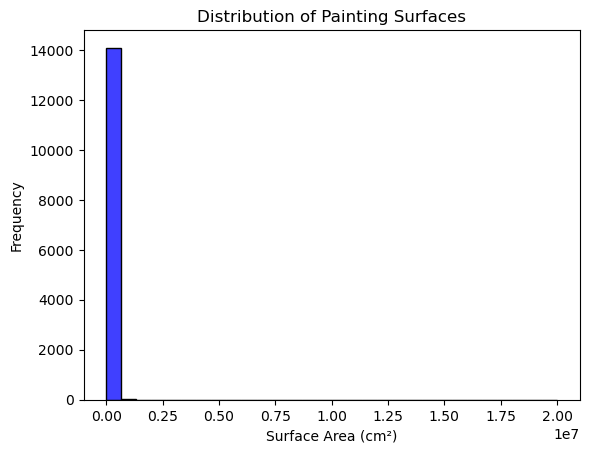

In [16]:
df_train_clean = df_train.dropna(subset=['surface'])

#plotting histogram
sns.histplot(df_train_clean['surface'], bins = 30,color='blue')
plt.title('Distribution of Painting Surfaces')
plt.xlabel('Surface Area (cm²)')
plt.ylabel('Frequency')
plt.show()

not usefull, use logtransformation:

/var/folders/y6/2mg4f4gx0955xc9_y_q271nr0000gp/T/ipykernel_1620/2593646835.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_clean['log_surface'] = np.log1p(df_train_clean['surface'])


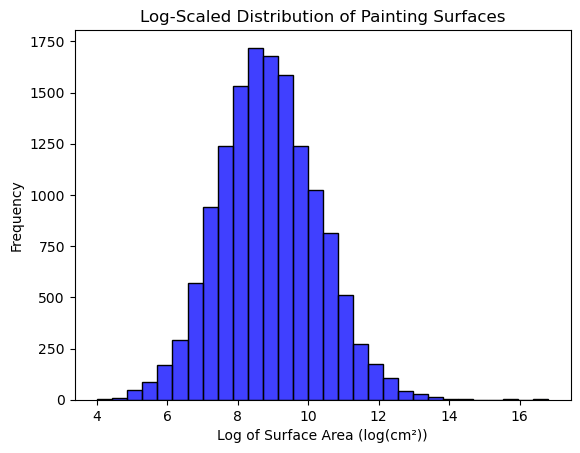

In [17]:
df_train_clean = df_train.dropna(subset=['surface'])

df_train_clean['log_surface'] = np.log1p(df_train_clean['surface'])

sns.histplot(df_train_clean['log_surface'], bins=30, color='blue') 
plt.title('Log-Scaled Distribution of Painting Surfaces') 
plt.xlabel('Log of Surface Area (log(cm²))') 
plt.ylabel('Frequency') 
plt.show() 

## Type

In [18]:
type_counts = df_train['type'].value_counts()
type_counts.describe()

count      10.000000
mean     1924.400000
std      2203.901853
min        57.000000
25%       518.000000
50%      1278.000000
75%      2333.000000
max      7481.000000
Name: type, dtype: float64

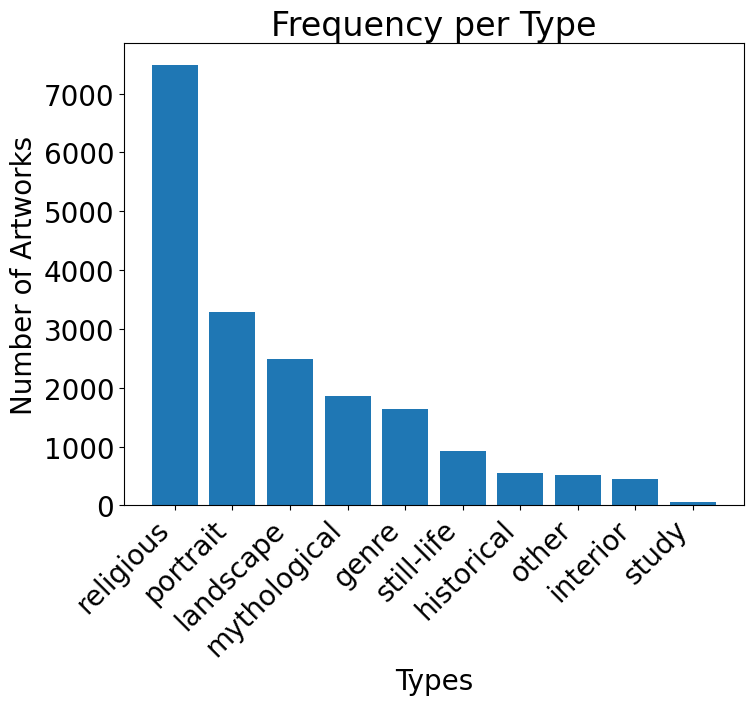

In [33]:
plt.figure(figsize=(8, 6))
plt.bar(type_counts.index, type_counts.values) 
plt.xlabel('Types', fontsize=20) 
plt.ylabel('Number of Artworks', fontsize=20) 
plt.title('Frequency per Type', fontsize=24)  
plt.xticks(rotation=45, ha='right', fontsize=20) 
plt.yticks(fontsize=20)
plt.show()

## School

In [21]:
school_counts = df_train['school'].value_counts()
school_counts.describe()

count      26.000000
mean      740.153846
std      1693.052739
min         5.000000
25%        24.500000
50%        78.500000
75%       362.500000
max      8011.000000
Name: school, dtype: float64

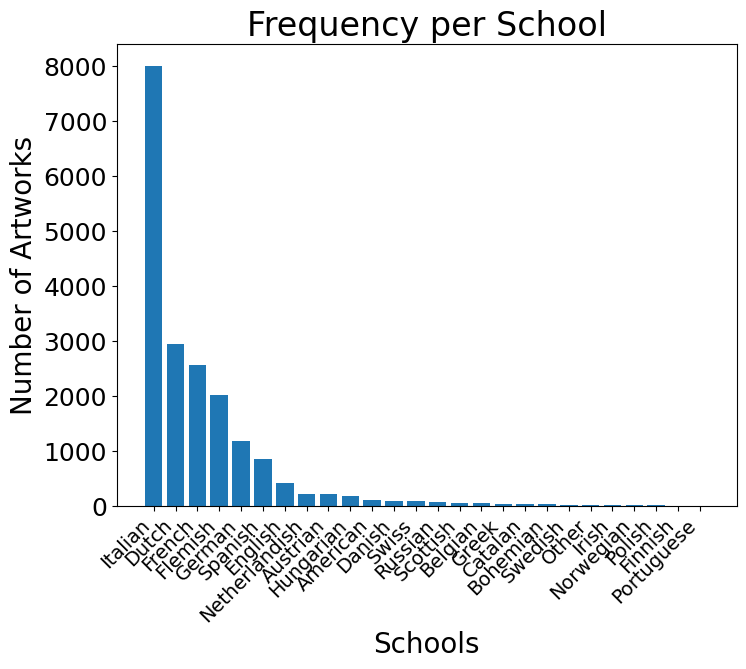

In [32]:
plt.figure(figsize=(8, 6))
plt.bar(school_counts.index, school_counts.values) 
plt.xlabel('Schools', fontsize=20) 
plt.ylabel('Number of Artworks', fontsize=20) 
plt.title('Frequency per School', fontsize=24)  
plt.xticks(rotation=45, ha='right', fontsize=14) 
plt.yticks(fontsize = 18)
plt.show()

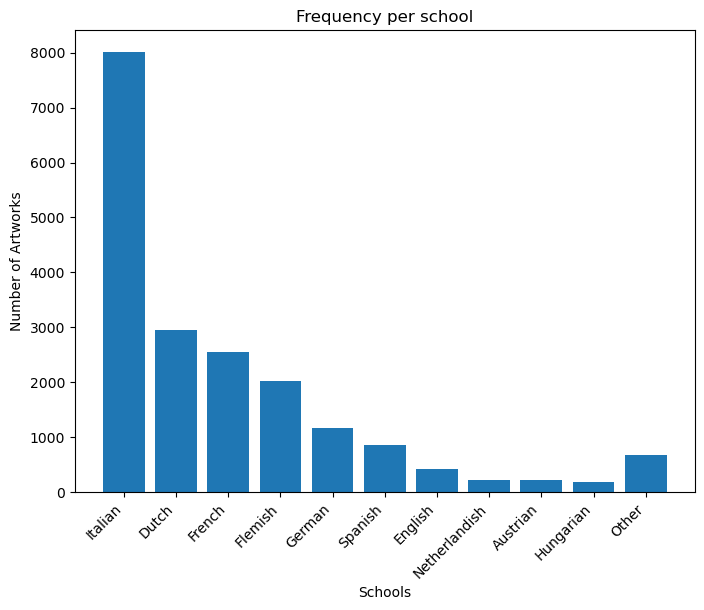

In [39]:
new_school_counts = school_counts.head(10)

#calculate the count of "Other" authors not in the top 10
other_count = school_counts[10:].sum()

# Append the "Other" count to the top authors
new_school_counts['Other'] = other_count

plt.figure(figsize=(8, 6))
plt.bar(new_school_counts.index, new_school_counts.values) 
plt.xlabel('Schools') 
plt.ylabel('Number of Artworks') 
plt.title('Frequency per school')  
plt.xticks(rotation=45, ha='right')  
plt.show()

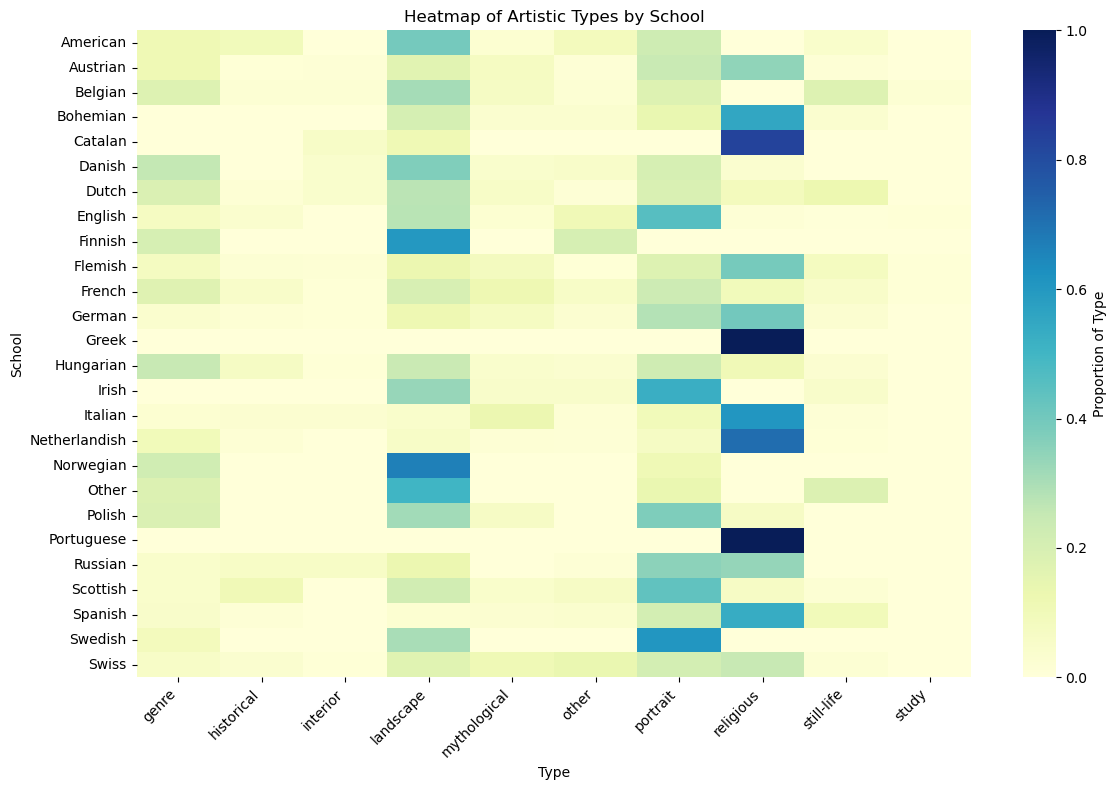

In [129]:
#group by school and type, and count
school_type_counts = df_train.groupby(['school', 'type']).size().unstack(fill_value=0)

#normalize counts
school_type_normalized = school_type_counts.div(school_type_counts.sum(axis=1), axis=0)

plt.figure(figsize=(12, 8))
sns.heatmap(school_type_normalized, cmap='YlGnBu', annot=False, cbar_kws={'label': 'Proportion of Type'})
plt.title('Heatmap of Artistic Types by School')
plt.xlabel('Type')
plt.ylabel('School')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Timeframe

In [28]:
timeframe_counts = df_train['timeframe'].value_counts().sort_index()
timeframe_counts.describe()

count      22.000000
mean      874.727273
std      1010.487868
min         1.000000
25%        15.750000
50%       508.500000
75%      1547.500000
max      3404.000000
Name: timeframe, dtype: float64

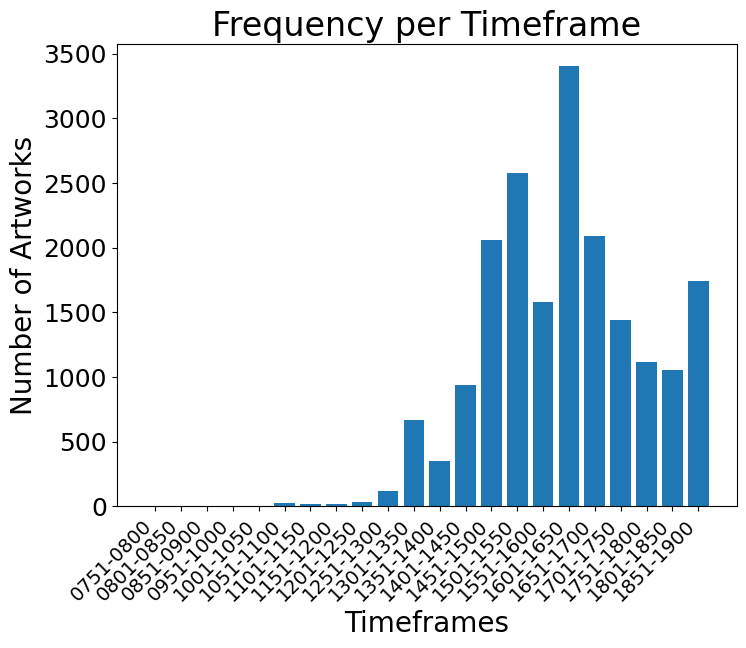

In [31]:
plt.figure(figsize=(8, 6))
plt.bar(timeframe_counts.index, timeframe_counts.values) 
plt.xlabel('Timeframes', fontsize=20) 
plt.ylabel('Number of Artworks', fontsize=20) 
plt.title('Frequency per Timeframe', fontsize=24)  
plt.xticks(rotation=45, ha='right', fontsize=14) 
plt.yticks(fontsize=18)
plt.show()

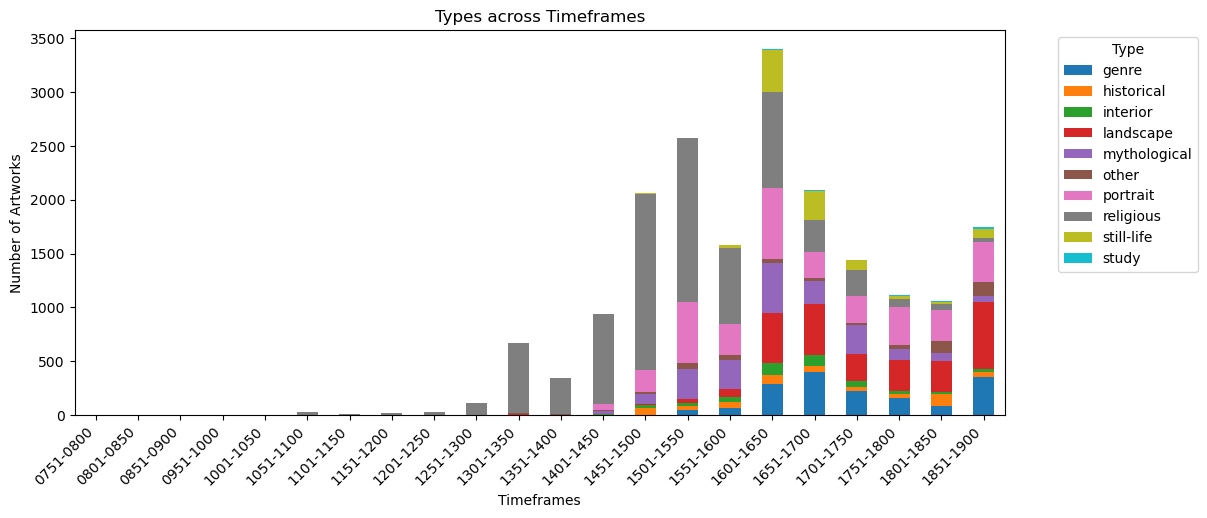

In [144]:
#group the data by timeframe and type, and count
genre_timeframe_counts = df_train.groupby(['timeframe', 'type']).size().unstack(fill_value=0)

#stacked bar chart
genre_timeframe_counts.plot(kind='bar', stacked=True, figsize = (12,5))
plt.title('Types across Timeframes')
plt.xlabel('Timeframes')
plt.ylabel('Number of Artworks')
plt.xticks(rotation=45, ha='right') 
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
